# Bike Sharing Assignment 
#### Submitted by Vedavyas Burli

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Build a multiple linear regression model for the prediction of demand for shared bikes.

In [3]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 200

import  matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('day.csv',parse_dates=['dteday'])
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1. Data Understanding
- Check shape of df
- Check descriptive information and statistics


In [6]:
print("rows and columns",df.shape)
print('---------')
print("df information: ",df.info())
print('---------')
print("Describe:",df.describe())

rows and columns (730, 16)
---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64    

### 2. Data cleaning
- Checking value_couts on df to identify the unknown values

In [24]:
#Understand the data in different categorical column, create dummy df and check the value count 
# ignoring instant column as it has unique values
df_dummy = df.iloc[:,1:16]
for i in df_dummy:
    print(df_dummy[i].value_counts())

2019-10-25    1
2019-12-22    1
2019-03-08    1
2018-01-15    1
2018-03-18    1
             ..
2018-08-04    1
2018-10-05    1
2019-11-11    1
2019-02-12    1
2018-12-21    1
Name: dteday, Length: 730, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64
32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           ..
36.96315    1
24

#### <font color=red>Outcome of data understanding:</font>
- Dataset has 730 rows(records) and 16 columns (attributes).
- By looking at the data it is observed that some fields are categorical in nature.
- No unknown values

### 1.1 Check for Null or missing values

In [9]:
#no null data
#df.isnull().sum()
print(round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False).head(10))

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
dtype: float64


#### <font color=red>Outcome of data quality check:</font>
- There are no NULL or missing values

### 3. Data preparation
- Remove unwanted columns
    - removing dteday column as we already have yr and month column
    - removing casual and ergisterd col as both these columns contains the count of bike booked by different categories of customers which deviates from our objective to find total cout of customers
    - removing instant columns it is only an serial number or index col

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
df_new_bike = df[[ 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp',  'hum', 'windspeed',
        'cnt']]


In [16]:
df_new_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


#### Outcome: 
- New df is created by removing unwanted and redundant columns

### 3.1 Create dummy variables for categorical variables
- We have observed that season,mnth,weekday,weathersit should be  converted into categorical data type
- change data type of season,mnth,weekday,weathersit  variables

In [17]:
#check data type before conversion
df_new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [18]:
df_new_bike.season = df_new_bike.season.astype('category')
df_new_bike.mnth = df_new_bike.mnth.astype('category')
df_new_bike.weekday = df_new_bike.weekday.astype('category')
df_new_bike.weathersit = df_new_bike.weathersit.astype('category')

In [19]:
df_new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


### <font color=blue>From data dictionary we will map numbers to understandable text</font>

In [20]:
#map df.Season to four categorical variable
df_new_bike['season'] = df_new_bike['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

#map df.weathersit values to respective understandable text
df_new_bike['weathersit'] = df_new_bike['weathersit'].map({1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'})

In [21]:
print(df_new_bike.season.value_counts())
print(df_new_bike.weathersit.value_counts())
df_new_bike.head(10)


Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64
Clear              463
Misty+Cloudy       246
Light Snow/Rain     21
Name: weathersit, dtype: int64


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,Misty+Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,1,0,0,0,Misty+Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600
5,Spring,0,1,0,4,1,Clear,8.378268,51.8261,6.000868,1606
6,Spring,0,1,0,5,1,Misty+Cloudy,8.057402,49.8696,11.304642,1510
7,Spring,0,1,0,6,0,Misty+Cloudy,6.765000,53.5833,17.875868,959
8,Spring,0,1,0,0,0,Clear,5.671653,43.4167,24.250650,822
9,Spring,0,1,0,1,1,Clear,6.184153,48.2917,14.958889,1321


In [22]:
# map month varbales to respective month

df_new_bike['mnth'] = df_new_bike['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [23]:
#  map weekday to respetive days
df_new_bike['weekday'] = df_new_bike['weekday'].map({0:'Mon',1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri',5:'Sat',6:'Sun'})

### Create dummy variables

In [24]:
# Create dummies
df_new_bike = pd.get_dummies(df_new_bike, drop_first=True)

In [25]:
df_new_bike.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,weathersit_Misty+Cloudy,weathersit_Light Snow/Rain
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7,0,0,0,6.765000,53.5833,17.875868,959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
8,0,0,0,5.671653,43.4167,24.250650,822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
print(df_new_bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   hum                         730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   season_Summer               730 non-null    uint8  
 8   season_Fall                 730 non-null    uint8  
 9   season_Winter               730 non-null    uint8  
 10  mnth_Feb                    730 non-null    uint8  
 11  mnth_Mar                    730 non-null    uint8  
 12  mnth_Apr                    730 non-null    uint8  
 13  mnth_May                    730 non

In [30]:
# Check the shape
print(df_new_bike.shape)

(730, 29)


### <font color=blue>Split the data into train and test data</font>

In [32]:
# Specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_new_bike, train_size = 0.70, random_state = 100)

In [33]:
print('Train data shape',df_train.shape)
print('Test data shape',df_test.shape)

Train data shape (510, 29)
Test data shape (220, 29)


### Perform EDA on train data

#### 1. Visualizing numeric varibale


In [34]:
# [ 'temp',  'hum', 'windspeed','cnt'] are numeric variable
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   hum                         510 non-null    float64
 5   windspeed                   510 non-null    float64
 6   cnt                         510 non-null    int64  
 7   season_Summer               510 non-null    uint8  
 8   season_Fall                 510 non-null    uint8  
 9   season_Winter               510 non-null    uint8  
 10  mnth_Feb                    510 non-null    uint8  
 11  mnth_Mar                    510 non-null    uint8  
 12  mnth_Apr                    510 non-null    uint8  
 13  mnth_May                    510 n

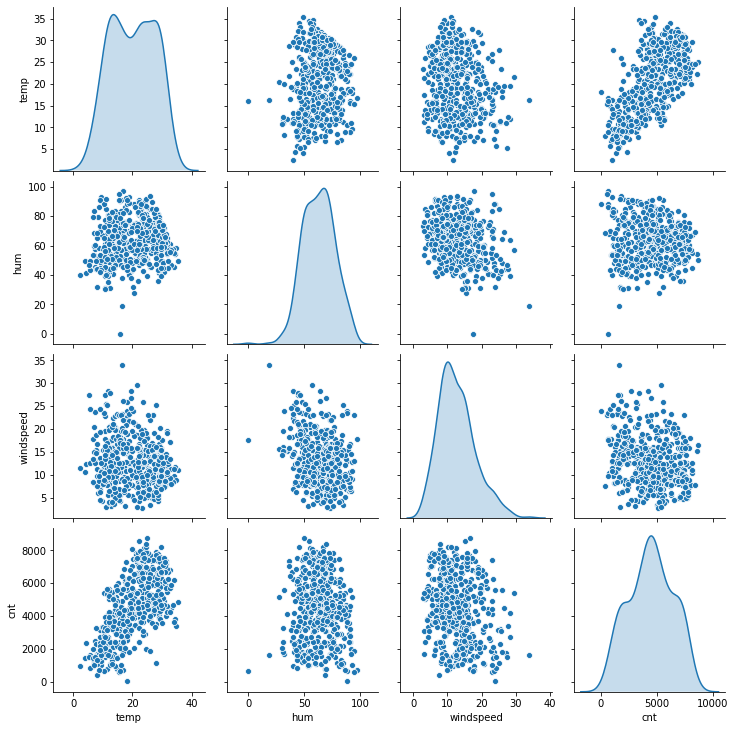

In [37]:
# Create a new dataframe of only numeric variables:

df_numeric = df_train[[ 'temp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_numeric, diag_kind='kde')
plt.show()

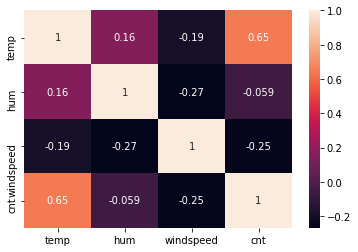

In [38]:
sns.heatmap(df_numeric.corr(),annot=True)
plt.show()

### outcome of pairplot and heat map 
- We can observe that 'temp' and 'cnt' have linear relation 

###  2. Visulaizing categorical variables

In [39]:
# season, mnth weekday and weathersit are categorical variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   hum                         510 non-null    float64
 5   windspeed                   510 non-null    float64
 6   cnt                         510 non-null    int64  
 7   season_Summer               510 non-null    uint8  
 8   season_Fall                 510 non-null    uint8  
 9   season_Winter               510 non-null    uint8  
 10  mnth_Feb                    510 non-null    uint8  
 11  mnth_Mar                    510 non-null    uint8  
 12  mnth_Apr                    510 non-null    uint8  
 13  mnth_May                    510 n

#### Bar plot to visualize the categorical variable

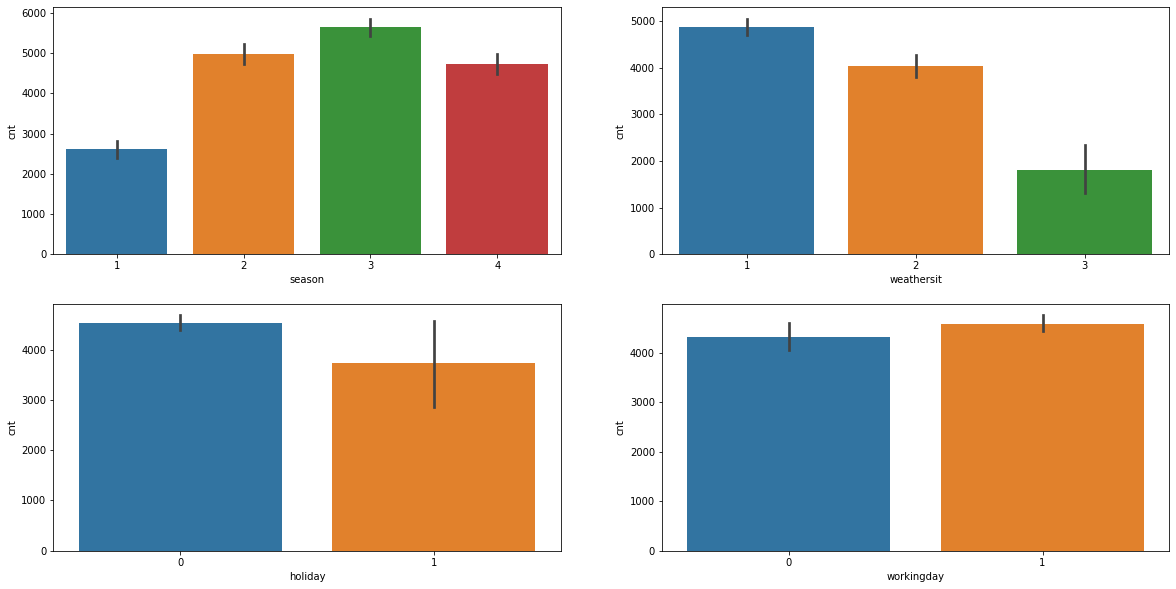

In [40]:
plt.figure(figsize=(20.0,10.0))
plt.subplot(221)
sns.barplot(x="season",y='cnt',data=df)
plt.subplot(222)
sns.barplot(x="weathersit",y='cnt',data=df)
plt.subplot(223)
sns.barplot(x="holiday",y='cnt',data=df)
plt.subplot(224)
sns.barplot(x="workingday",y='cnt',data=df)
plt.show()

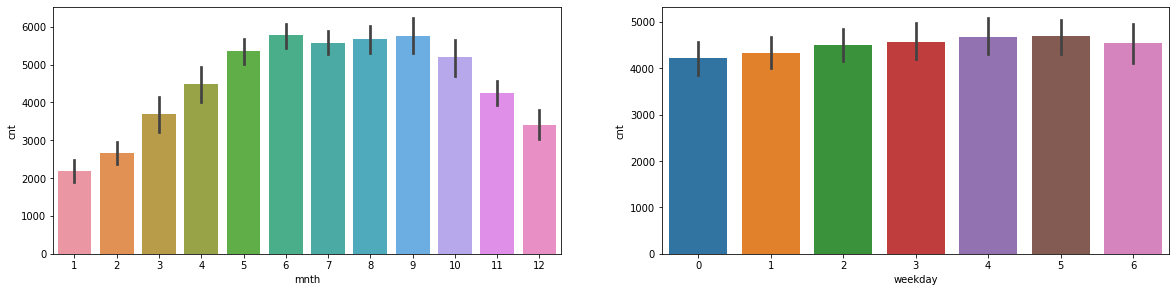

In [41]:
plt.figure(figsize=(20.0,10.0))
plt.subplot(221)
sns.barplot(x="mnth",y='cnt',data=df)
plt.subplot(222)
sns.barplot(x="weekday",y='cnt',data=df)
plt.show()

#### Box plot to visualize categorical variable

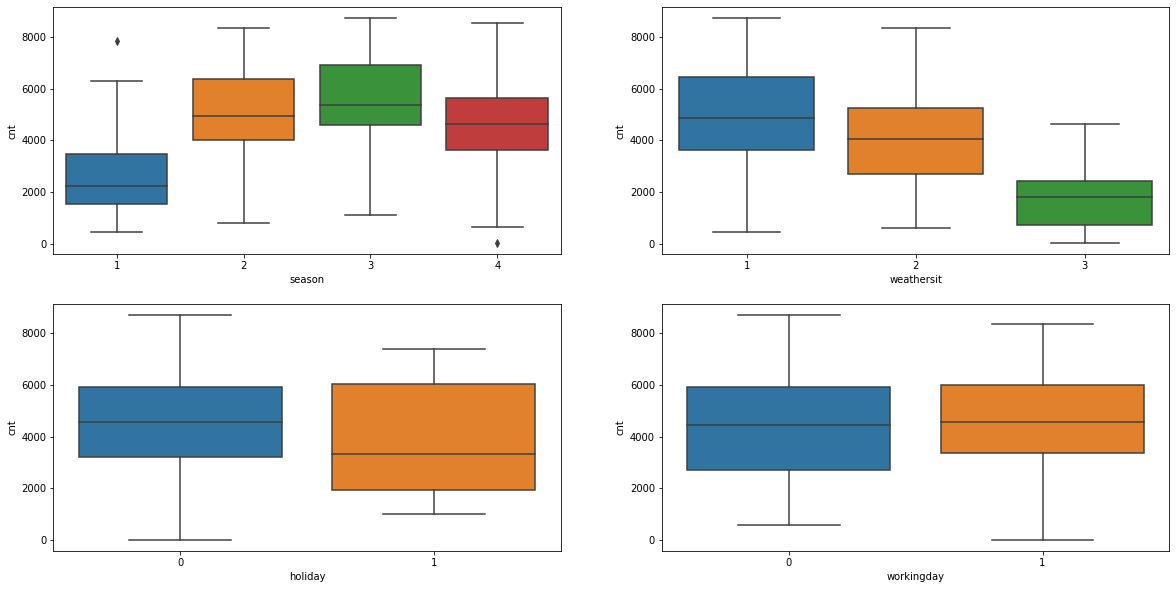

In [42]:
plt.figure(figsize=(20.0,10.0))

plt.subplot(221)
sns.boxplot(x="season",y='cnt',data=df)
plt.subplot(222)
sns.boxplot(x="weathersit",y='cnt',data=df)
plt.subplot(223)
sns.boxplot(x="holiday",y='cnt',data=df)
plt.subplot(224)
sns.boxplot(x="workingday",y='cnt',data=df)
plt.show()

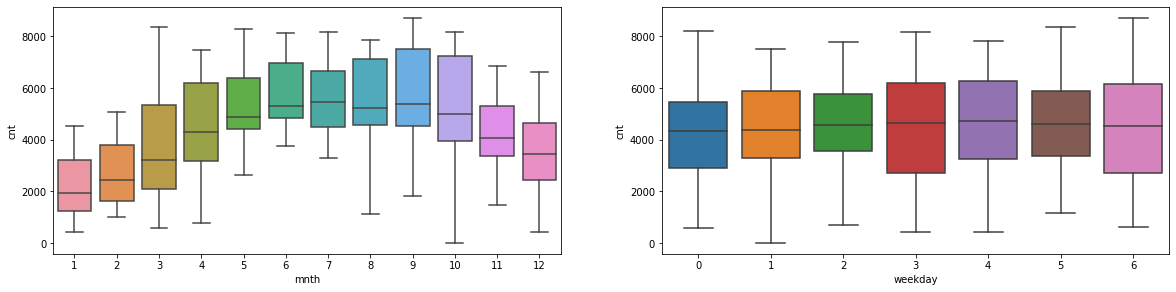

In [43]:
plt.figure(figsize=(20.0,10.0))
plt.subplot(221)
sns.boxplot(x="mnth",y='cnt',data=df)
plt.subplot(222)
sns.boxplot(x="weekday",y='cnt',data=df)
plt.show()

#### Outcome: 
There were 6 categorical variables in the dataset. 
- Box plot is used to their effect on the dependent variable 'cnt': count of total rental bikes including both casual and registered .
- Higher number of  bike booking were happening in fall season with a median of over 5000 booking (for the period of 2 years). 
- This was followed by summer  & winter season. 
- mnth: Almost 10% of the bike booking were happening in the months may,june july,aug,sep,oct with a median of over 4000 booking per month. 
- weathersit: Almost more than 50 % of the bike booking were happening during Clear weather with a median of close to 5000 booking (for the period of 2 years).This was followed by misty+cloud  with 30% of total booking.
- weekday and workingday can be good predictor of dependent variable

#### correlation coefficients to see which variables are highly correlated

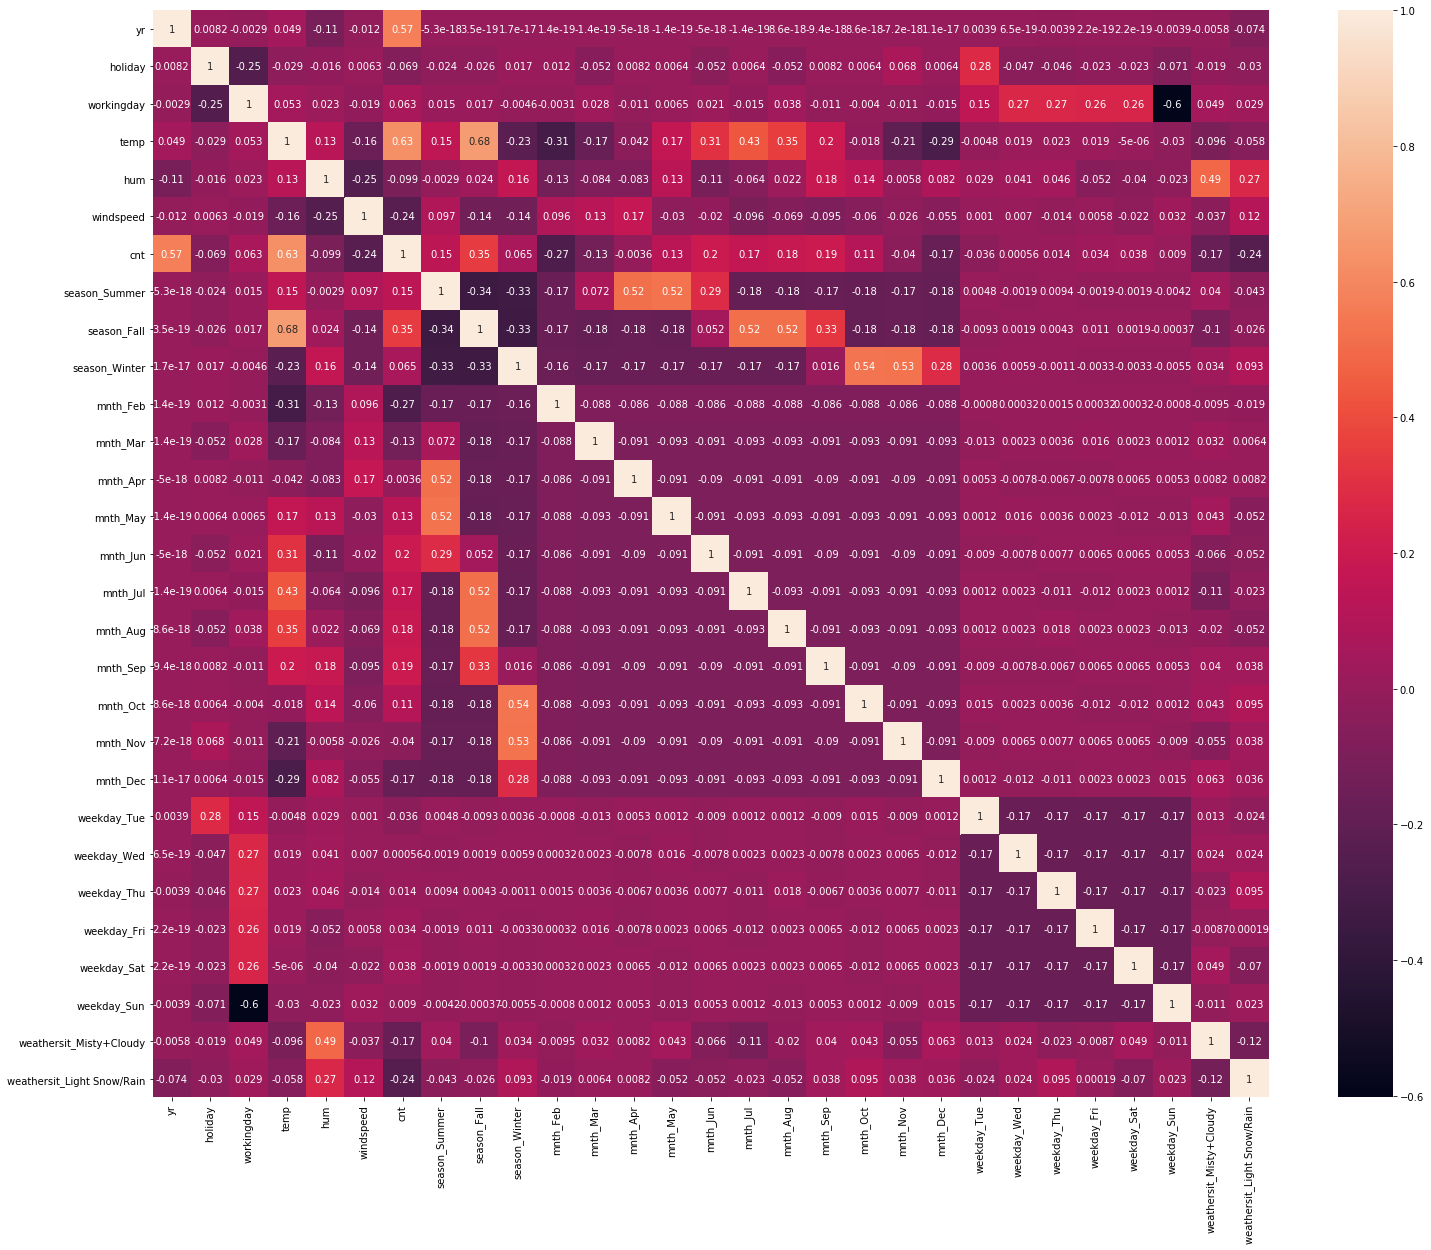

In [44]:
plt.figure(figsize=(25,20))
sns.heatmap(df_new_bike.corr(),annot=True)
plt.show()

In [167]:
df_new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Summer               730 non-null    uint8  
 9   season_Fall                 730 non-null    uint8  
 10  season_Winter               730 non-null    uint8  
 11  mnth_Feb                    730 non-null    uint8  
 12  mnth_Mar                    730 non-null    uint8  
 13  mnth_Apr                    730 non

#### Outcome
- With  the help of heatmap  all variable are multicollinear in nature
- using above heat map we will  validate different correlated values along  with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

### Rescaling the feature - Applying normalization 

In [45]:
scaler = MinMaxScaler()
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,weathersit_Misty+Cloudy,weathersit_Light Snow/Rain
576,1,0,1,29.246653,70.4167,11.083475,7216,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
111,0,0,1,13.803347,72.9583,14.707907,1683,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [46]:
# Applying scaler() to all the numeric variables

numeric_var = ['temp',  'hum', 'windspeed','cnt']
df_train[numeric_var] = scaler.fit_transform(df_train[numeric_var])

In [47]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,weathersit_Misty+Cloudy,weathersit_Light Snow/Rain
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [48]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,weathersit_Misty+Cloudy,weathersit_Light Snow/Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,0.066667,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,0.249689,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building linear regression model

In [49]:
# x_train,y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [50]:
# Running RFE with output number of variables = 15
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Summer', True, 1),
 ('season_Fall', False, 6),
 ('season_Winter', True, 1),
 ('mnth_Feb', False, 11),
 ('mnth_Mar', False, 7),
 ('mnth_Apr', False, 10),
 ('mnth_May', False, 8),
 ('mnth_Jun', False, 9),
 ('mnth_Jul', False, 12),
 ('mnth_Aug', False, 2),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Nov', False, 13),
 ('mnth_Dec', False, 14),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', True, 1),
 ('weekday_Thu', True, 1),
 ('weekday_Fri', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 4),
 ('weathersit_Misty+Cloudy', False, 3),
 ('weathersit_Light Snow/Rain', True, 1)]

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Summer', 'season_Winter', 'mnth_Sep', 'weekday_Tue',
       'weekday_Wed', 'weekday_Thu', 'weekday_Fri', 'weekday_Sat',
       'weathersit_Light Snow/Rain'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['season_Fall', 'mnth_Feb', 'mnth_Mar', 'mnth_Apr', 'mnth_May',
       'mnth_Jun', 'mnth_Jul', 'mnth_Aug', 'mnth_Oct', 'mnth_Nov', 'mnth_Dec',
       'weekday_Sun', 'weathersit_Misty+Cloudy'],
      dtype='object')

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### 4. Modelling
#### Model 1 - all feature variables are selected

#### VIF check

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_Tue,inf
10,weekday_Wed,inf
11,weekday_Thu,inf
12,weekday_Fri,inf
13,weekday_Sat,inf
4,hum,10.96
3,temp,7.20
5,windspeed,3.59


In [56]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Checking the parameter obtained
lr1.params

const                         0.257232
yr                            0.226910
holiday                      -0.067386
workingday                    0.023389
temp                          0.592082
hum                          -0.277927
windspeed                    -0.201410
season_Summer                 0.089142
season_Winter                 0.144621
mnth_Sep                      0.104226
weekday_Tue                  -0.017033
weekday_Wed                  -0.015780
weekday_Thu                  -0.003346
weekday_Fri                  -0.006005
weekday_Sat                  -0.001833
weathersit_Light Snow/Rain   -0.196715
dtype: float64

In [57]:
# Summary of lr model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          4.91e-181
Time:                        21:06:36   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Outcome
- Removing variable weekday_Sat because of high p value

#### Model 2 -  all the feature variables and their respective VIFs - drop weekday_Sat

In [58]:
X_train_new1 = X_train_rfe.drop(["weekday_Sat"], axis = 1)

#### VIF check

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
4,hum,10.96
2,workingday,7.44
3,temp,7.20
5,windspeed,3.59
9,weekday_Tue,2.29
11,weekday_Thu,2.27
12,weekday_Fri,2.06
10,weekday_Wed,2.04
0,yr,2.03
7,season_Winter,1.64


#### <font color=blue> VIF has decreased from infinity to finite value after removing the variable with higer p-value</font>

In [60]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new1)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.params)
# Summary of lr model 2
lr2.summary()

const                         0.257232
yr                            0.226910
holiday                      -0.069218
workingday                    0.021556
temp                          0.592082
hum                          -0.277927
windspeed                    -0.201410
season_Summer                 0.089142
season_Winter                 0.144621
mnth_Sep                      0.104226
weekday_Tue                  -0.015200
weekday_Wed                  -0.013947
weekday_Thu                  -0.001514
weekday_Fri                  -0.004173
weathersit_Light Snow/Rain   -0.196715
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          4.91e-181
Time:                        21:07:43   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2572      0.027      9.543      0.000       0.204       0.310
yr                             0.2269      0.008     27.028      0.000       0.210       0.243
holiday                       -0.0692      0.030     -2.271      0.024      -0.129      -0.009
workingday                     0.0216      0.014      1.551      0.121      -0.006       0.049
temp                           0.5921      0.020     29.378      0.000       0.552       0.632
hum                           -0.2779      0.032     -8.735      0.000      -0.340      -0.215
windspeed                     -0.2014      0.026     -7.666      0.000      -0.253      -0.150
season_Summer                  0.0891      0.010      8.501      0.000       0.069       0.110
season_Winter                  0.1446      0.011     13.493      0.000       0.124       0.166
mnth_Sep                       0.1042      0.016      6.482      0.000       0.073       0.136
weekday_Tue                   -0.0152      0.016     -0.943      0.346      -0.047       0.016
weekday_Wed                   -0.0139      0.016     -0.856      0.392      -0.046       0.018
weekday_Thu                   -0.0015      0.016     -0.097      0.923      -0.032       0.029
weekday_Fri                   -0.0042      0.016     -0.257      0.798      -0.036       0.028
weathersit_Light Snow/Rain    -0.1967      0.026     -7.593      0.000      -0.248      -0.146
==============================================================================
Omnibus:                       57.957   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.885
Skew:                          -0.681   Prob(JB):                     2.27e-24
Kurtosis:                       4.809   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 3 - Remving weekday_Thu col having higer p-value

In [61]:
X_train_new2 = X_train_new1.drop(["weekday_Thu"], axis = 1)

In [62]:
#VIF check
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
4,hum,10.96
3,temp,7.20
2,workingday,4.50
5,windspeed,3.59
0,yr,2.03
7,season_Winter,1.64
9,weekday_Tue,1.64
6,season_Summer,1.58
11,weekday_Fri,1.47
10,weekday_Wed,1.46


In [64]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.2
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          3.52e-182
Time:                        21:08:03   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -957.8
Df Residuals:                     496   BIC:                            -898.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2573      0.027      9.555      0.000       0.204       0.310
yr                             0.2269      0.008     27.056      0.000       0.210       0.243
holiday                       -0.0700      0.029     -2.383      0.018      -0.128      -0.012
workingday                     0.0207      0.011      1.908      0.057      -0.001       0.042
temp                           0.5921      0.020     29.407      0.000       0.553       0.632
hum                           -0.2780      0.032     -8.745      0.000      -0.340      -0.216
windspeed                     -0.2014      0.026     -7.673      0.000      -0.253      -0.150
season_Summer                  0.0891      0.010      8.514      0.000       0.069       0.110
season_Winter                  0.1446      0.011     13.506      0.000       0.124       0.166
mnth_Sep                       0.1042      0.016      6.488      0.000       0.073       0.136
weekday_Tue                   -0.0144      0.014     -1.056      0.292      -0.041       0.012
weekday_Wed                   -0.0131      0.014     -0.950      0.342      -0.040       0.014
weekday_Fri                   -0.0033      0.014     -0.243      0.808      -0.030       0.024
weathersit_Light Snow/Rain    -0.1969      0.026     -7.641      0.000      -0.248      -0.146
==============================================================================
Omnibus:                       57.830   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.623
Skew:                          -0.679   Prob(JB):                     2.59e-24
Kurtosis:                       4.807   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model 4:  Remving weekday_Fri col having higer p-value

In [65]:
X_train_new3 = X_train_new2.drop(["weekday_Fri"], axis = 1)

In [66]:
#VIF check
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
4,hum,10.95
3,temp,7.20
2,workingday,3.73
5,windspeed,3.58
0,yr,2.03
7,season_Winter,1.64
6,season_Summer,1.58
9,weekday_Tue,1.46
10,weekday_Wed,1.32
1,holiday,1.23


In [67]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm4).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          2.48e-183
Time:                        21:08:21   Log-Likelihood:                 492.87
No. Observations:                 510   AIC:                            -959.7
Df Residuals:                     497   BIC:                            -904.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2570      0.027      9.561      0.000       0.204       0.310
yr                             0.2269      0.008     27.082      0.000       0.210       0.243
holiday                       -0.0713      0.029     -2.474      0.014      -0.128      -0.015
workingday                     0.0197      0.010      1.978      0.048       0.000       0.039
temp                           0.5921      0.020     29.436      0.000       0.553       0.632
hum                           -0.2776      0.032     -8.752      0.000      -0.340      -0.215
windspeed                     -0.2014      0.026     -7.680      0.000      -0.253      -0.150
season_Summer                  0.0891      0.010      8.526      0.000       0.069       0.110
season_Winter                  0.1446      0.011     13.517      0.000       0.124       0.166
mnth_Sep                       0.1041      0.016      6.491      0.000       0.073       0.136
weekday_Tue                   -0.0133      0.013     -1.034      0.301      -0.039       0.012
weekday_Wed                   -0.0121      0.013     -0.922      0.357      -0.038       0.014
weathersit_Light Snow/Rain    -0.1971      0.026     -7.658      0.000      -0.248      -0.147
==============================================================================
Omnibus:                       57.905   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.717
Skew:                          -0.680   Prob(JB):                     2.47e-24
Kurtosis:                       4.807   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 5 : dropping weekday_Wed col

In [68]:
X_train_new4 = X_train_new3.drop(["weekday_Wed"], axis = 1)

In [69]:
#VIF check
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
4,hum,10.94
3,temp,7.20
5,windspeed,3.58
2,workingday,3.36
0,yr,2.03
7,season_Winter,1.64
6,season_Summer,1.58
9,weekday_Tue,1.38
1,holiday,1.22
8,mnth_Sep,1.20


In [70]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm5).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.8
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          2.48e-184
Time:                        21:08:37   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -960.9
Df Residuals:                     498   BIC:                            -910.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2579      0.027      9.601      0.000       0.205       0.311
yr                             0.2269      0.008     27.086      0.000       0.210       0.243
holiday                       -0.0735      0.029     -2.560      0.011      -0.130      -0.017
workingday                     0.0168      0.009      1.778      0.076      -0.002       0.035
temp                           0.5916      0.020     29.426      0.000       0.552       0.631
hum                           -0.2782      0.032     -8.774      0.000      -0.340      -0.216
windspeed                     -0.2019      0.026     -7.701      0.000      -0.253      -0.150
season_Summer                  0.0890      0.010      8.512      0.000       0.068       0.109
season_Winter                  0.1444      0.011     13.504      0.000       0.123       0.165
mnth_Sep                       0.1044      0.016      6.514      0.000       0.073       0.136
weekday_Tue                   -0.0105      0.012     -0.840      0.401      -0.035       0.014
weathersit_Light Snow/Rain    -0.1960      0.026     -7.624      0.000      -0.246      -0.145
==============================================================================
Omnibus:                       57.412   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.902
Skew:                          -0.672   Prob(JB):                     2.25e-24
Kurtosis:                       4.822   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 6: dropping hum  col having higher VIF

In [71]:
X_train_new5 = X_train_new4.drop(["weekday_Tue"], axis = 1)

In [72]:
#VIF check
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_new5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new5.values, i) for i in range(X_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
4,hum,10.94
3,temp,7.19
5,windspeed,3.58
2,workingday,3.13
0,yr,2.02
7,season_Winter,1.64
6,season_Summer,1.58
8,mnth_Sep,1.20
9,weathersit_Light Snow/Rain,1.09
1,holiday,1.08


In [73]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new5)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm6).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          2.19e-185
Time:                        21:08:44   Log-Likelihood:                 492.07
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2585      0.027      9.632      0.000       0.206       0.311
yr                             0.2265      0.008     27.093      0.000       0.210       0.243
holiday                       -0.0816      0.027     -3.015      0.003      -0.135      -0.028
workingday                     0.0147      0.009      1.617      0.107      -0.003       0.033
temp                           0.5921      0.020     29.472      0.000       0.553       0.632
hum                           -0.2791      0.032     -8.810      0.000      -0.341      -0.217
windspeed                     -0.2019      0.026     -7.706      0.000      -0.253      -0.150
season_Summer                  0.0888      0.010      8.500      0.000       0.068       0.109
season_Winter                  0.1441      0.011     13.488      0.000       0.123       0.165
mnth_Sep                       0.1047      0.016      6.532      0.000       0.073       0.136
weathersit_Light Snow/Rain    -0.1957      0.026     -7.615      0.000      -0.246      -0.145
==============================================================================
Omnibus:                       56.679   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.979
Skew:                          -0.663   Prob(JB):                     3.57e-24
Kurtosis:                       4.824   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 7 : dropping workingday col having higher p-value

In [74]:
X_train_new6 = X_train_new5.drop(["workingday"], axis = 1)

In [75]:
#VIF check
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_new6.columns
vif['VIF'] = [variance_inflation_factor(X_train_new6.values, i) for i in range(X_train_new6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,10.02
2,temp,7.11
4,windspeed,3.54
0,yr,2.01
6,season_Winter,1.64
5,season_Summer,1.58
7,mnth_Sep,1.20
8,weathersit_Light Snow/Rain,1.09
1,holiday,1.04


In [76]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new6)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm7).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          4.74e-186
Time:                        21:09:01   Log-Likelihood:                 490.74
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     500   BIC:                            -919.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2682      0.026     10.234      0.000       0.217       0.320
yr                             0.2268      0.008     27.103      0.000       0.210       0.243
holiday                       -0.0915      0.026     -3.467      0.001      -0.143      -0.040
temp                           0.5928      0.020     29.471      0.000       0.553       0.632
hum                           -0.2784      0.032     -8.776      0.000      -0.341      -0.216
windspeed                     -0.2034      0.026     -7.755      0.000      -0.255      -0.152
season_Summer                  0.0892      0.010      8.523      0.000       0.069       0.110
season_Winter                  0.1434      0.011     13.413      0.000       0.122       0.164
mnth_Sep                       0.1052      0.016      6.554      0.000       0.074       0.137
weathersit_Light Snow/Rain    -0.1948      0.026     -7.570      0.000      -0.245      -0.144
==============================================================================
Omnibus:                       60.303   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.427
Skew:                          -0.717   Prob(JB):                     1.73e-24
Kurtosis:                       4.759   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#model 8 dropping weekday_Thu col
X_train_new7 = X_train_new6.drop(["hum"], axis = 1)

In [78]:
#VIF check
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_new7.columns
vif['VIF'] = [variance_inflation_factor(X_train_new7.values, i) for i in range(X_train_new7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_Summer,1.55
5,season_Winter,1.34
6,mnth_Sep,1.20
7,weathersit_Light Snow/Rain,1.06
1,holiday,1.03


In [80]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new7)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          9.22e-172
Time:                        21:09:40   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0875      0.017      5.029      0.000       0.053       0.122
yr                             0.2334      0.009     26.093      0.000       0.216       0.251
holiday                       -0.0867      0.028     -3.060      0.002      -0.142      -0.031
temp                           0.5682      0.021     26.580      0.000       0.526       0.610
windspeed                     -0.1455      0.027     -5.340      0.000      -0.199      -0.092
season_Summer                  0.0812      0.011      7.256      0.000       0.059       0.103
season_Winter                  0.1261      0.011     11.179      0.000       0.104       0.148
mnth_Sep                       0.0895      0.017      5.229      0.000       0.056       0.123
weathersit_Light Snow/Rain    -0.2535      0.027     -9.506      0.000      -0.306      -0.201
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.317
Skew:                          -0.761   Prob(JB):                     8.20e-24
Kurtosis:                       4.640   Cond. No.                         9.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Outcome: 
- model 8  looks good, as there seems to be VERY LOW Multicollinearity between the predictors  
- The p-values for all the predictors seems to be significant.
- Considering this as our final model

### 5. Final model preparation

##### linear regression (lr8)  Coefficient  values:
- const	0.0875	
- yr	0.2334	
- holiday	-0.0867	
- temp	0.5682	
- windspeed	-0.1455	
- season_Summer	0.0812	
- season_Winter	0.1261	
- mnth_Sep	0.0895	
- weathersit_Light Snow/Rain	-0.2535	


### 5.1 Hypothesis testing
- H0: β1=β2=0
- H1: βi != 0 
#### From the summary of lr8 model - it is evident that all of our coefficient are not equal to zero hence
#### <font color=red>WE REJECT THE NULL HYPOTHESIS</font>

### 5.2 F statistics 
- F-statistic:	256.6
- Prob (F-statistic):	9.22e-172
#### <b>The F-Statistics value of 256.6 - which is greater than 1 and the p-value is approximately 0.0000 which  states that the overall model is significant</b>

#### Interpretation of coefficient
- const: constant value is 0.0875 - indicates that in the absence of all other preditors bike rental can still increase by 0.0875 units.
- yr :  A coefficient value indicates that a unit increase in yr variable, increases the bike hire numbers by 0.2308 units.
- holiday: A coefficient value indicates that a unit increase in holiday variable, decrease the bike hire numbers by -0.0867 units.
- temp: A coefficient value indicates that a unit increase in temp variable, increases the bike hire numbers by 0.5682 units.
- windspeed A coefficient value indicates that a unit increase in windspeed variable, decreases the bike hire numbers by-0.1455 
- season_Summer:  A coefficient value indicates that a unit increase in season_Summer variable, increases the bike hire numbers by 0.0812
- season_Winter:  A coefficient value indicates that a unit increase in temp variable, increases the bike hire numbers by 0.1261
- mnth_sep: A coefficient value indicates that a unit increase in temp variable, increases the bike hire numbers by mnth_Sep 0.0895
- weathersit_Light Snow/Rain:  A coefficient value indicates that a unit decreases in weathersit_Light Snow/Rain variable, decrease the bike hire numbers by -0.2535

#### <font color=blue>The equation of the best fit regression line based in lr8 </font>

- cnt = 0.0875 + (yr * 0.2308) - (holiday * 0.0867 ) + (temp * 0.5682 ) - (windspeed * 0.1455 ) + (season_Summer * 0.0812) + (season_Winter * 0.1261) + (mnth_sep * 0.0895) - (weathersit_Light Snow/Rain * 0.2535)

### 6. Residual analysis of training data

In [81]:
y_train_pred = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

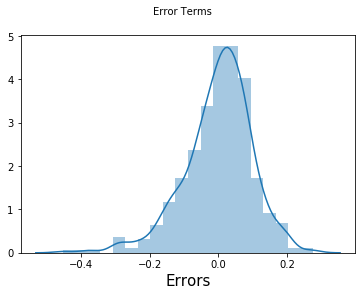

In [99]:
#plotting distrubution graph to see if residuals are normally distributed
fig = plt.figure()

res = y_train-y_train_pred
# Plot the histogram of the error terms
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 10)
plt.xlabel('Errors', fontsize = 15)

### Outcome - Our assumption for linear regression is valid.
- From the above graph we can conclude that residuals are normally distributed

### 7. Predicting using final model
- Using lr8 we are ready to go ahead and predict based on fitted model and assumptions

In [84]:
# Applying only transform - to prevent the data leak into training set
# Applying scaler() to all the numeric variables

numeric_var = ['temp', 'hum', 'windspeed','cnt']
df_test[numeric_var] = scaler.transform(df_test[numeric_var])

In [85]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,weathersit_Misty+Cloudy,weathersit_Light Snow/Rain
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [86]:
df_test.shape

(220, 29)

In [87]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,weathersit_Misty+Cloudy,weathersit_Light Snow/Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,0.100000,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,0.300684,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
# x_test,y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [495]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          220 non-null    int64  
 1   holiday                     220 non-null    int64  
 2   workingday                  220 non-null    int64  
 3   temp                        220 non-null    float64
 4   atemp                       220 non-null    float64
 5   hum                         220 non-null    float64
 6   windspeed                   220 non-null    float64
 7   season_Summer               220 non-null    uint8  
 8   season_Fall                 220 non-null    uint8  
 9   season_Winter               220 non-null    uint8  
 10  mnth_Feb                    220 non-null    uint8  
 11  mnth_Mar                    220 non-null    uint8  
 12  mnth_Apr                    220 non-null    uint8  
 13  mnth_May                    220 n

In [89]:
#Selecting the variables that were part of final model.
final_col=X_train_new7.columns

In [90]:
X_test=X_test[final_col]

# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       220 non-null    float64
 1   yr                          220 non-null    int64  
 2   holiday                     220 non-null    int64  
 3   temp                        220 non-null    float64
 4   windspeed                   220 non-null    float64
 5   season_Summer               220 non-null    uint8  
 6   season_Winter               220 non-null    uint8  
 7   mnth_Sep                    220 non-null    uint8  
 8   weathersit_Light Snow/Rain  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 11.2 KB


In [91]:
# Predict using final model lr8
y_pred = lr8.predict(X_test_lm8)

Text(0, 0.5, 'y_pred')

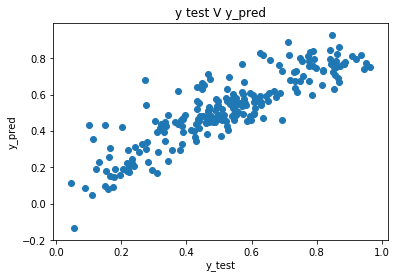

In [95]:
plt.title('y test V y_pred')
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

### <font color=red>Calculate R-squared score on the test set.</font>

In [96]:
r2_score(y_test, y_pred)

0.7720731949554798

### Calculate adjusted R-squared score on test set

In [97]:
#We know the formula for adjusted r square  --> 1-(1-r2)*(n-1)/(n-p-1)
#we know r2 value i.e. 0.7720731949554798
r2 = 0.7720731949554798
# n is number of rows in X_test
n = X_test.shape[0]
# p is number of predictors 
p = X_test.shape[1]

adjusted_r2_score = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2_score

0.7634314203566354

#### Final Result:
- <font color=blue>Train r2 = 0.804</font>
- <font color=blue>Trained adjusted r2 = 0.801</font>
- --

- <font color=blue>Test r2 =0.7720731949554798</font>
- <font color=blue>Test adjusted r2 =0.7634314203566354</font>
    
   

### Conclusion
#### Based on our analysis and assumptions There are 3 factors which are  affecting the demand for these shared bikes in the American market.
    - Temp
    - year (yr)
    - Season

- Above mentioned variables are significant in predicting the demand for shared bikes.
- temperature , year and season must be given high importance while planning to achive max booking
- Other features like month, weather ,windspeed,holday  need to be considered eventhough they have negative impact